# Creating University Program Curriculumn based on Clustering of Skills in Job Postings  (Assignment 3 template)


### Import Python libraries

In [2]:
import numpy as np
import pandas as pd
import os
import requests
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## Machine Learning libraries
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch
from scipy import zeros as sci_zeros
from scipy.spatial.distance import euclidean
from scipy.cluster.hierarchy import ClusterWarning
from warnings import simplefilter
simplefilter("ignore", ClusterWarning)

### Load job postings web-scraped from Indeed.com

In [12]:
## Sample dataset file name (replace this sample dataset with the dataset to be used in Assignment 3)
filename_data = '/content/Indeed_job_vacancies.csv'

## Read csv file (dataset)
results = pd.read_csv(filename_data)

#Change column names
results.rename(columns={'Job_Title': 'Title', 'Company_Name': 'Company', 'Job_Description': 'Descriptions'}, inplace=True)

In [9]:
results = pd.read_csv('/content/Indeed_job_vacancies.csv')
results.rename(columns={'Job_Title': 'Title', 'Company_Name': 'Company', 'Job_Description': 'Descriptions'}, inplace=True)


### Extract skills from job postings

Replace with your own classification of skills. You may use ChatGPT to generate Python code for extracting skills from job descriptions.

In [ ]:
## Programming/systems skills
sskills = {}
sskills['Python'] = []
sskills['Matlab'] = []

## Technical, data-related, modeling/algorithms skills
tskills = {}
tskills['Data Management']=[]
tskills['Big Data']=[]


## Business intelligence, project management, consulting, negotiation skills
bskills={}
bskills['Project Management']=[]
bskills['Consulting']=[]


## Teamwork and communication skills
pskills={}
pskills['Teamwork']=[]
pskills['Creativity']=[]


## Extract skills from job postings
for ir, dfr in results.iterrows():
    cleantext = str(dfr["Descriptions"])

    if("excel " in cleantext.lower()) or ("excel," in cleantext.lower()) or ("excel." in cleantext.lower()):
        sskills['Excel'].append('1')
    else:
        sskills['Excel'].append('0')

    if("sql" in cleantext.lower()) or ("structured quer" in cleantext.lower()) or ("server" in cleantext.lower()):
        sskills['SQL'].append('1')
    else:
        sskills['SQL'].append('0')

    if("databas" in cleantext.lower()) or ("data mana" in cleantext.lower()) or ("data ha" in cleantext.lower()) or ("data lak" in cleantext.lower()) or ("data war" in cleantext.lower()) or ("data eng" in cleantext.lower())  or ("data proc" in cleantext.lower()):
        tskills['Data Management'].append('1')
    else:
        tskills['Data Management'].append('0')

    if("machine learning" in cleantext.lower()):
        tskills['Machine Learning'].append('1')
    else:
        tskills['Machine Learning'].append('0')

    if("modeling technologies" in cleantext.lower()) or ("modeling technology" in cleantext.lower()) or ("modeling" in cleantext.lower()) or ("model" in cleantext.lower()):
        tskills['Modeling'].append('1')
    else:
        tskills['Modeling'].append('0')

    if("creativit" in cleantext.lower()) or ("creative" in cleantext.lower()) or ("creat" in cleantext.lower()):
        pskills['Creativity'].append('1')
    else:
        pskills['Creativity'].append('0')

    if("communication" in cleantext.lower()):
        pskills['Communication'].append('1')
    else:
        pskills['Communication'].append('0')

In [ ]:
## Create dataframe with extracted skills (1 if a skill was found in job description, 0 if a skills was not found in job description)
df1 = results[['Title', 'Company', 'Location', 'Descriptions']].copy()
df2 = pd.DataFrame(sskills)
df3 = pd.DataFrame(tskills)
df4 = pd.DataFrame(bskills)
df5 = pd.DataFrame(pskills)
frames = [df1, df2, df3, df4, df5]
res = pd.concat(frames, axis = 1)
res.head()

In [ ]:
## Save skills as 2D array
df = res.iloc[:,4:]
df_summary = df.apply(pd.to_numeric)
a = df_summary.values

print("Number of job postings:", a.shape[0])
print(a)

### Hierarchical clustering of skills

Import Machine Learning libraries in Python

In [ ]:
## Create empty matrix to fill
D = np.zeros([a.shape[1],a.shape[1]])

## Find all element-wise skill proximities (distances)
for k in range(a.shape[0]):
    for i in range(a.shape[1]):
        for j in range(a.shape[1]):
            #Calculate proximities

In [ ]:
## Creating Dendrogram for our data (Y is linkage matrix)

## You may try different methods

#Y = sch.linkage(D, method='complete')
#Y = sch.linkage(D, method='average')
#Y = sch.linkage(D, method='centroid')

[]

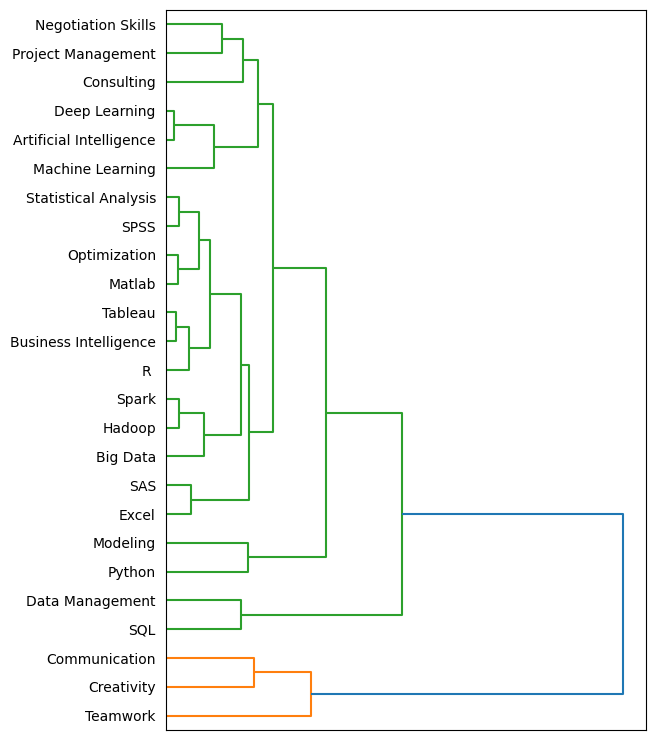

In [ ]:
## Plot dendrogram

fig = plt.figure(figsize=(12,12))
ax = fig.add_axes([0.1,0.1,0.4,0.6])

Z = sch.dendrogram(Y, orientation='right')
labels = df_summary.columns[Z['leaves']]
ax.set_xticks([])
ax.set_yticklabels(labels)

plt.savefig('dendrogram.png', format='png', bbox_inches='tight')
plt.plot()

### Print clusters for selected distance level

In [ ]:
## Cutting the dendrogram at max_d
max_d = #??

[]

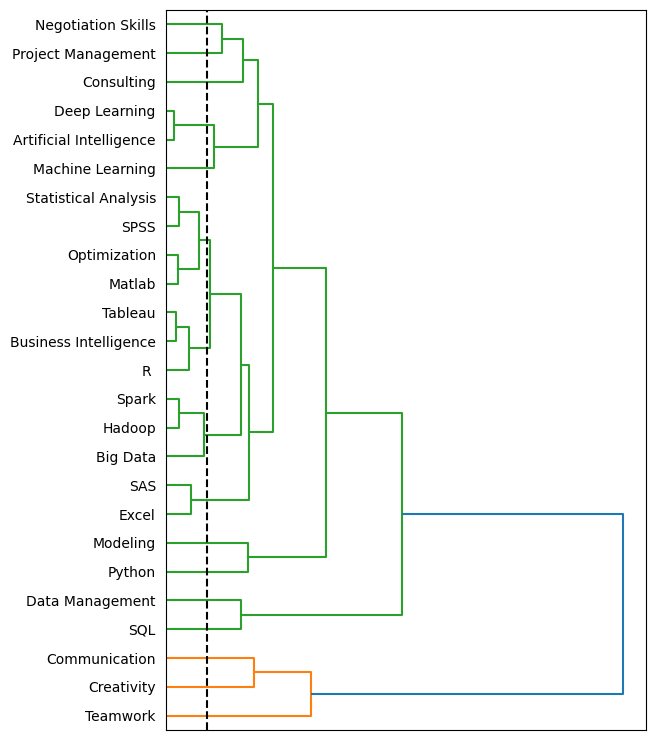

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_axes([0.1,0.1,0.4,0.6])

Z = sch.dendrogram(Y, orientation='right')
labels = df_summary.columns[Z['leaves']]
ax.set_xticks([])
ax.set_yticklabels(labels)

# Cutting the dendrogram at max_d
plt.axvline(x=max_d*D.max(), c='k', linestyle='--')

plt.plot()

In [ ]:
## Identify clusters with max_d cut

lbs = sch.fcluster(Y, max_d*D.max(), 'distance')
clustr = lbs[Z['leaves']]

clust_skls = {}
for k in list(set(clustr)):
    clust_skls[k] = []

for j in range(len(labels)):
    clust_skls[clustr[j]].append(labels[j])

In [ ]:
for key, value in clust_skls.items():
    print(key, value)

1 ['Creativity']
2 ['Communication']
3 ['Teamwork']
4 ['SQL']
5 ['Data Management']
6 ['Python']
7 ['Modeling']
8 ['Excel', 'SAS']
9 ['Big Data', 'Hadoop', 'Spark']
10 ['R ', 'Business Intelligence', 'Tableau']
11 ['Matlab', 'Optimization', 'SPSS', 'Statistical Analysis']
12 ['Artificial Intelligence', 'Deep Learning']
13 ['Machine Learning']
14 ['Project Management']
15 ['Negotiation Skills']
16 ['Consulting']


In [ ]:
print("Number of automatically created clusters:",len(clust_skls))

Number of automatically created clusters: 16


### Manually adjust clusters before analysis (if necessary)

In [ ]:
clust_skills = {}
clust_skills[0] = ['Project Management', 'Negotiation Skills']
clust_skills[1] = ['Consulting']
clust_skills[2] = ['Artificial Intelligence', 'Machine Learning', 'Deep Learning']
clust_skills[3] = ['Statistical Analysis', 'SPSS']
clust_skills[4] = ['Optimization']
clust_skills[5] = ['Business Intelligence', 'Tableau', 'Power BI']
clust_skills[6] = ['Big Data', 'Hadoop', 'Spark']
clust_skills[7] = ['Excel', 'SAS']
clust_skills[8] = ['Modeling', 'Python']
clust_skills[9] = ['Data Management', 'SQL']
clust_skills[10] = ['Creativity', 'Communication', 'Teamwork']

In [ ]:
len(clust_skills)
print("Number of manually adjusted clusters:",len(clust_skills))

Number of manually adjusted clusters: 11


### Import OpenAI library and load API keys

In [ ]:
try:
    import openai
except:
    !pip install openai
    import openai

In [ ]:
## API Key
API_KEY= "your-api-key-here"

os.environ['OPENAI_API_KEY'] =API_KEY
openai.api_key = os.getenv("OPENAI_API_KEY")

In [ ]:
## OpenAI API parameters
model = "gpt-3.5-turbo" # 4K tokens
# model = "gpt-3.5-turbo-16k"
max_tokens = 1024
n = 1
stop = None
temperature = 0.5

### Create list of courses based on clusters of skills

In [ ]:
input_skills = ''
for i in clust_skills.keys():
    input_skills += 'Course ' + str(i+1) + ': ' + ', '.join(clust_skills[i]) + '; '
input_skills = input_skills[:-2]

In [ ]:
print(input_skills)

#### ChatGPT prompt

In [ ]:
prompt_1 = 'Write your prompt here: {input}'

In [ ]:
prompt1 = prompt_1.format(input=input_skills)
print(prompt1)

In [ ]:
# Call OpenAI API for the first prompt
response1 = openai.ChatCompletion.create(
    model=model,
    messages=[
    {"role": "system", "content": "You are a helpful  assistant."},
    {"role": "user", "content": prompt1},
    ],
    max_tokens=max_tokens,
    n=n,
    stop=stop,
    temperature=temperature,
)

In [ ]:
output1 = response1['choices'][0]['message']['content']
print(output1)